<a href="https://colab.research.google.com/github/MaxSannikov2004/CompGeo/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1_%D0%B8%D1%81%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%BE_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 1**
## Геометрические предикаты и расстояния (2D)

**Цель:** собрать базовый набор 2D-предикатов, который дальше используется во многих алгоритмах вычислительной геометрии.


### Оценивание (за полную лабораторную работу)
- **8:** всё реализовано корректно, есть тесты и визуализации, объяснены краевые случаи.
- **6–7:** мелкие недочёты в тестах/оформлении.
- **4–5:** часть функций реализована или есть ошибки на краях.
- **1–3:** попытка есть, но ключевые функции некорректны.
- **0:** не выполнено.

---

## Как работать в Colab
1. Откройте ноутбук в Google Colab.
2. Последовательно выполняйте ячейки сверху вниз.
3. В местах `# TODO` допишите код.
4. В конце запустите ячейку **Self-check** — она должна завершиться без ошибок.


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

EPS = 1e-9

def set_axes_equal_2d(ax):
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, alpha=0.3)

def plot_polyline(ax, pts, closed=False, **kw):
    pts = np.array(pts, dtype=float)
    if closed:
        pts = np.vstack([pts, pts[0]])
    ax.plot(pts[:,0], pts[:,1], **kw)

def plot_points(ax, pts, **kw):
    pts = np.array(pts, dtype=float)
    ax.scatter(pts[:,0], pts[:,1], **kw)

## 1) **Предикаты и расстояния**


**Задача:** реализовать предикат `orient(A, B, C)`.

- Возвращает `+1`, если тройка точек образует **против часовой стрелки** (CCW).
- Возвращает `-1`, если **по часовой стрелке** (CW).
- Возвращает `0`, если точки **коллинеарны** (с учётом `EPS`).

In [ ]:
def orient(A, B, C):
    """Ориентация тройки точек.
    +1: CCW, -1: CW, 0: коллинеарны (с учётом EPS).
    """
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)
    C = np.array(C, dtype=float)
    cross = (B[0]-A[0])*(C[1]-A[1]) - (B[1]-A[1])*(C[0]-A[0])
    if abs(cross) <= EPS:
        return 0
    return 1 if cross > 0 else -1


**Задача:** реализовать `dist_point_line(P, a, b, c)`.


*   Возвращает расстояние от точки `P(x,y)` до прямой `ax+by+c=0`



Краевые случаи
- Если `a = 0` и `b = 0`, это не прямая (уравнение некорректно).  
  В таком случае корректно **бросить исключение**: `raise ValueError(...)`.

In [ ]:
def dist_point_line(P, a, b, c):
    """Расстояние от точки P(x,y) до прямой ax+by+c=0.
    Краевой случай: если a=b=0 — это не прямая.
    """
    if abs(a) <= EPS and abs(b) <= EPS:
        raise ValueError("Некорректная прямая: a = b = 0")
    x, y = P
    return abs(a*x + b*y + c) / math.hypot(a, b)


**Задача:** реализовать `on_segment`.

- Возвращает булево значение (`True` или `False`): принадлежность точки `P(x,y)` отрезку `[A,B]`.

- Необходимо проверить коллинеарность точки `P(x,y)` концам отрезка `[A,B]`.  
  В ином случае корректно **бросить исключение**: `raise ValueError(...)`.
  
  **Обратите внимание на крайние случаи:**
- `a = b` (вырожденный отрезок)
- `p` совпадает с концом отрезка

In [ ]:
def on_segment(A, B, P):
    """Принадлежность точки P отрезку [A,B] (включая концы)."""
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)
    P = np.array(P, dtype=float)

    # 1) Коллинеарность
    if orient(A, B, P) != 0:
        return False

    # 2) Внутри ограничивающего прямоугольника
    return (min(A[0], B[0]) - EPS <= P[0] <= max(A[0], B[0]) + EPS and
            min(A[1], B[1]) - EPS <= P[1] <= max(A[1], B[1]) + EPS)


**Задача**: реализовать `segments_intersect`.

- Возвращает булево значение (`True` или `False`): пересекаются ли отрезки `[A,B]` и `[C,D]`.

Учесть все случаи: пересечение, касание (в вершине/на стороне), коллинеарность и перекрытие, отсутствие пересечения.

In [ ]:
def segments_intersect(A, B, C, D):
    """Пересечение (или касание) отрезков [A,B] и [C,D]."""
    o1 = orient(A, B, C)
    o2 = orient(A, B, D)
    o3 = orient(C, D, A)
    o4 = orient(C, D, B)

    # Строгое пересечение
    if o1*o2 < 0 and o3*o4 < 0:
        return True

    # Касания / коллинеарные случаи
    if o1 == 0 and on_segment(A, B, C): return True
    if o2 == 0 and on_segment(A, B, D): return True
    if o3 == 0 and on_segment(C, D, A): return True
    if o4 == 0 and on_segment(C, D, B): return True

    return False


## 2) **Многоугольники**

**Задача**: реализовать `polygon_area`.

*  Возвращает число (float): ориентированную площадь простого многоугольника poly.



> `poly` — список вершин в порядке обхода, например, `square = [(0,0),(1,0),(1,1),(0,1)]`



In [ ]:
def polygon_area(poly):
    s = 0.0
    n = len(poly)
    for i in range(n):
        x1,y1 = poly[i]
        x2,y2 = poly[(i+1)%n]
        s += x1*y2 - y1*x2
    return 0.5*s

**Задача**: реализовать `point_in_polygon`.

*  Возвращает булево значение (`True` или `False`): принадлежит ли точка `Q(x,y)` многоугольнику `poly`.

> `poly` — список вершин в порядке обхода, например, `square = [(0,0),(1,0),(1,1),(0,1)]`

In [ ]:
def point_in_polygon(Q, poly):
    """Проверка принадлежности точки Q многоугольнику poly (включая границу).
    Реализация: ray casting (луч вправо).
    """
    x, y = Q
    inside = False
    n = len(poly)

    for i in range(n):
        A = poly[i]
        B = poly[(i + 1) % n]

        # На границе
        if on_segment(A, B, Q):
            return True

        x1, y1 = A
        x2, y2 = B

        # Упорядочим ребро так, чтобы y1 <= y2
        if y1 > y2:
            x1, y1, x2, y2 = x2, y2, x1, y1

        # Пересечение луча y=const с ребром (полуинтервал по y)
        if y1 <= y < y2 and abs(y2 - y1) > EPS:
            x_int = x1 + (y - y1) * (x2 - x1) / (y2 - y1)
            if x_int > x:
                inside = not inside

    return inside


### 3) **Self-check**


In [ ]:
# self-check
def _assert(cond, msg="failed"):
    if not cond:
        raise AssertionError(msg)

# orient
_assert(orient((0,0),(1,0),(0,1)) == 1)
_assert(orient((0,0),(1,0),(0,-1)) == -1)
_assert(orient((0,0),(1,0),(2,0)) == 0)

# dist_point_line
d = dist_point_line((1,0), 1, -1, -0.5)
_assert(abs(d - (0.5/math.sqrt(2))) < 1e-9)

try:
    dist_point_line((0,0), 0, 0, 1)
    _assert(False, "dist_point_line должен бросать ValueError при a=b=0")
except ValueError:
    pass

# on_segment
_assert(on_segment((0,0),(2,0),(1,0)))
_assert(not on_segment((0,0),(2,0),(1,1)))

# segments_intersect
seg_tests = [
    ((0,0),(2,0),(1,-1),(1,1), True),
    ((0,0),(2,0),(3,-1),(3,1), False),
    ((0,0),(2,0),(2,0),(3,0), True),
    ((0,0),(3,0),(1,0),(2,0), True),
]
for A,B,C,D,ans in seg_tests:
    _assert(segments_intersect(A,B,C,D) == ans)

# polygon_area
square = [(0,0),(1,0),(1,1),(0,1)]
A = polygon_area(square)
_assert(abs(A-1.0) < 1e-9)

# point_in_polygon
_assert(point_in_polygon((0.5,0.5), square))
_assert(not point_in_polygon((2,2), square))
_assert(point_in_polygon((0,0.5), square))  # на границе

print("SELF-CHECK OK ✅")


SELF-CHECK OK ✅


### 4) **Визуализация**

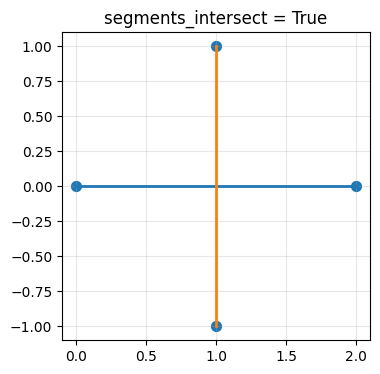

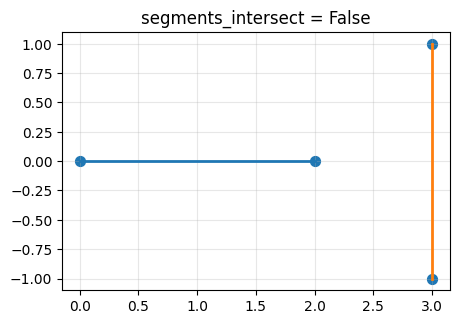

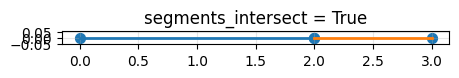

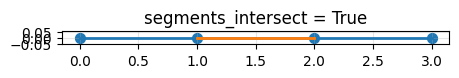

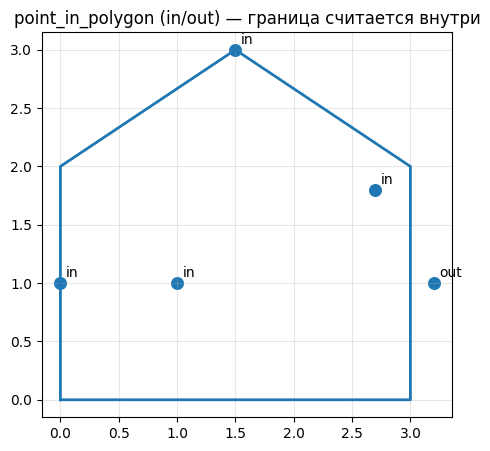

In [ ]:
# Визуализация примеров для отладки/защиты

# 1) Пересечение отрезков: несколько кейсов из self-check
cases = [
    ((0,0),(2,0),(1,-1),(1,1)),
    ((0,0),(2,0),(3,-1),(3,1)),
    ((0,0),(2,0),(2,0),(3,0)),
    ((0,0),(3,0),(1,0),(2,0)),
]

for (A,B,C,D) in cases:
    fig, ax = plt.subplots(figsize=(5,4))
    plot_polyline(ax, [A,B], closed=False, linewidth=2)
    plot_polyline(ax, [C,D], closed=False, linewidth=2)
    plot_points(ax, [A,B,C,D], s=50)
    ax.set_title(f"segments_intersect = {segments_intersect(A,B,C,D)}")
    set_axes_equal_2d(ax)
    plt.show()

# 2) Многоугольник и точки: внутри/снаружи/граница
poly = [(0,0),(3,0),(3,2),(1.5,3),(0,2)]  # простой пятиугольник
query_points = [(1,1), (2.7,1.8), (3.2,1.0), (0,1), (1.5,3)]  # разные случаи

fig, ax = plt.subplots(figsize=(6,5))
plot_polyline(ax, poly, closed=True, linewidth=2)
plot_points(ax, query_points, s=70)

for q in query_points:
    res = point_in_polygon(q, poly)
    ax.text(q[0] + 0.05, q[1] + 0.05, "in" if res else "out", fontsize=10)

ax.set_title("point_in_polygon (in/out) — граница считается внутри")
set_axes_equal_2d(ax)
plt.show()


## **Теоретические вопросы**

**1. Что такое ориентация тройки точек и как она вычисляется через определитель/векторное произведение в 2D?**

> Ориентация `A,B,C` определяется знаком псевдоскалярного произведения: `det((B−A)×(C−A))`

**2. Почему для `orient` в вычислительной геометрии важно возвращать знак, а не только величину?**

> Знак даёт дискретный ответ (лево/право/на линии), устойчивый для логики алгоритмов: пересечение отрезков, принадлежность точек, выпуклая оболочка и т.д. Величина не нужна и хуже переносится при численных ошибках.

**3. Что такое `EPS` и зачем он нужен? Какие проблемы решает и какие может создать?**

> `EPS` — маленький порог для сравнения `float` с нулём: если `|value|<EPS`, считаем 0. Нужен из-за ошибок округления. Минус: при слишком большом EPS можно “слить” разные случаи (например, почти параллельные прямые).

**4. Выведите формулу расстояния от точки до прямой `ax+by+c=0`. Откуда берётся знаменатель?**
$$
d=\frac{(|ax_0 + by_0 + c|)}{\sqrt{a^2 + b^2}}
$$

Числитель — значение уравнения (пропорционально “подписанной” дистанции), знаменатель — длина нормали.

**5. Почему случай `a=b=0` не задаёт прямую? Какие варианты обработки корректны (ошибка/NaN/∞)?**



> Почему `a=b=0` — не прямая
`0·x + 0·y + c = 0` либо:
`c=0` — вся плоскость (“всё является решением”)
`c≠0` — нет решений (пусто)
Это не геометрическая прямая, поэтому корректно: ошибка/исключение.

**6. Что означает “точка принадлежит отрезку”? Какие две проверки обязаны быть (коллинеарность + границы)?**

>Точка на отрезке — две проверки
(1) Коллинеарность: `orient(A,B,P)==0`
(2) Попадание в bounding box:
`min(xA,xB) ≤ xP ≤ max(...)` и то же по y.

**7. Перечислите все случаи пересечения отрезков: строгое, касание в вершине, наложение/коллинеарность.**

> 1. строгое пересечение (крест-накрест), касание в вершине, касание “внутри” (одна точка на другом отрезке), коллинеарное наложение (частичный/полный overlap), не пересекаются

**8. Почему в `segments_intersect` используются 4 ориентации `(o1..o4)`?**
>Проверяем, что концы одного отрезка лежат по разные стороны другого и наоборот:
`orient(A,B,C)` и `orient(A,B,D)`; `orient(C,D,A)` и `orient(C,D,B)`.
Если произведения знаков < 0 в обеих парах — строгое пересечение. Нули дают касания/коллинеарность.

**9. Что такое ориентированная площадь многоугольника? Как знак площади связан с направлением обхода?**

>По “шнуровке” получаем площадь со знаком. Если обход против часовой — площадь положительна, по часовой — отрицательна. Абсолютное значение — обычная площадь.

**10. В чём суть формулы “шнуровки” (Shoelace)? Почему работает?**
>Это дискретная форма интеграла по контуру (формула Грина): суммируем “трапеции” между рёбрами и осью, получая площадь.

**11. Объясните алгоритм ray casting для `point_in_polygon`. Почему происходит переключение `inside = not inside`?**
>Пускаем луч вправо от точки. Каждый раз, когда луч пересекает ребро многоугольника, мы “переключаемся” между вне/внутри. Нечётное число пересечений ⇒ внутри.

**12. Почему часто используют полуинтервалы по y (условие вида y1 <= y < y2)? Что это предотвращает?**
>Чтобы вершины не считались дважды: если луч проходит через вершину, два ребра сходятся и могут дать двойной учёт. Условие вида `y1 <= y < y2` фиксирует это.

**13. Какие численные/геометрические вырождения бывают (коллинеарность, совпадающие точки, нулевые отрезки) и как их учитывать?**

>коллинеарность (cross≈0)
нулевой отрезок (A==B)
повторяющиеся вершины
луч проходит через вершину/по ребру
почти параллельные прямые (float)
Решение: EPS, явные проверки границы, аккуратные условия по y, обработка нулевых случаев.

## **Практические вопросы**

**1. Даны A(0,0), B(2,0), C(1,1): чему равен orient(A,B,C) и почему?**

Считаем 2D cross:
$$
\text{cross}=(x_B-x_A)(y_C-y_A)-(y_B-y_A)(x_C-x_A)
$$
$$
\text{cross}=(2-0)(1-0)-(0-0)(1-0)=2>0
$$
Следовательно,
$$
\operatorname{orient}(A,B,C)=+1
$$
(поворот против часовой стрелки, точка \(C\) слева от направленного отрезка \(AB\)).


**2. Даны P(3,1) и прямая 2x-2y+2=0: посчитать `dist_point_line`.**
\(P(3,1)\) и прямая \(2x-2y+2=0\): найти расстояние от точки до прямой

Формула:
$$
d=\frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}
$$
Подставим \(a=2,\ b=-2,\ c=2,\ (x_0,y_0)=(3,1)\):
$$
|2\cdot 3+(-2)\cdot 1+2|=|6-2+2|=6
$$
$$
d=\frac{6}{\sqrt{2^2+(-2)^2}}=\frac{6}{\sqrt{8}}=\frac{3}{\sqrt{2}}\approx 2.121
$$

**3. Проверить on_segment для A(0,0), B(4,4) и точек P1(2,2), P2(2,3).**

Проверить принадлежность отрезку \(AB\): \(A(0,0)\), \(B(4,4)\), точки \(P_1(2,2)\), \(P_2(2,3)\)

Критерий \(P \in [AB]\):  
1) коллинеарность \(\operatorname{orient}(A,B,P)=0\)  
2) \(P\) внутри прямоугольника по координатам между \(A\) и \(B\)

- \(P_1(2,2)\): лежит на \(y=x\) и между \(A\) и \(B\) \(\Rightarrow\) **на отрезке**.  
- \(P_2(2,3)\): не коллинеарна (не на \(y=x\)) \(\Rightarrow\) **не на отрезке**.

**4. Даны отрезки [ (0,0)-(2,2) ] и [ (0,2)-(2,0) ]: пересекаются ли? Какой тип пересечения?**

Отрезки \((0,0)-(2,2)\) и \((0,2)-(2,0)\): пересекаются ли?

Да, пересекаются **строго** (крест-накрест) в точке
$$
(1,1).
$$

**5. Даны коллинеарные отрезки [ (0,0)-(4,0) ] и [ (2,0)-(6,0) ]: что вернёт segments_intersect и почему?**

Коллинеарные отрезки \((0,0)-(4,0)\) и \((2,0)-(6,0)\): пересекаются ли?

Оба на \(y=0\). Проверяем пересечение по \(x\):
$$
[0,4]\cap[2,6]=[2,4]\neq\varnothing
$$
Значит, **пересекаются (наложение/overlap)**.

**6. Посчитать `polygon_area` для треугольника `(0,0),(4,0),(0,3)` и объяснить знак.**

Площадь треугольника \((0,0),(4,0),(0,3)\)

Так как треугольник прямоугольный:
$$
S=\frac12\cdot 4\cdot 3=6.
$$
(По формуле «шнуровки» получится то же значение по модулю.)

**7. Для квадрата (0,0),(2,0),(2,2),(0,2) проверить точки: (1,1), (2,1), (3,1).**

Квадрат \((0,0),(2,0),(2,2),(0,2)\): точки \((1,1)\), \((2,1)\), \((3,1)\)

- \((1,1)\) — **inside** (внутри).  
- \((2,1)\) — **boundary** (на границе); если “граница считается внутри”, то **inside**.  
- \((3,1)\) — **outside** (снаружи).

**8. Как изменить `point_in_polygon`, чтобы граница считалась снаружи?**
Если точка лежит на ребре:
$$
P\in \partial \text{polygon}
$$
то возвращать **False** (или отдельный статус `boundary`), а не считать её внутри.

**9. Как реализовать расстояние от точки до отрезка (не до прямой): какие случаи надо рассмотреть?**

Считаем параметр проекции:
$$
t=\frac{(P-A)\cdot(B-A)}{\|B-A\|^2}
$$
- если \(t < 0\): ближайшая точка \(A\), расстояние \(\|P-A\|\)  
- если \(t > 1\): ближайшая точка \(B\), расстояние \(\|P-B\|\)  
- если \(0< t < 1\): ближайшая точка — проекция на \(AB\), расстояние — перпендикуляр до прямой \(AB\)

**10. Что произойдёт с `segments_intersect`, если один “отрезок” — это точка `(A==B)`? Как бы обработали?**

Тогда это “отрезок-точка”. Корректно обрабатывать отдельно:
- если оба вырождены: сравнить точки  
- если один вырожден: проверить, лежит ли эта точка на другом отрезке (`on_segment`)

**11. Предложите набор тестов, который хорошо ловит ошибки в `point_in_polygon` (горизонтальные рёбра, вершины, луч через вершину).**

- точка на ребре  
- точка в вершине  
- луч проходит через вершину (важно не посчитать дважды)  
- горизонтальные рёбра  
- точки очень близко к границе (проверка устойчивости)  
- повторяющиеся/почти совпадающие вершины

**12. Как переписать `orient` так, чтобы он работал без `float` для целых координат (и зачем это может быть нужно)?**

Для целых координат:
$$
\text{cross}=(x_B-x_A)(y_C-y_A)-(y_B-y_A)(x_C-x_A)
$$
и
$$
\operatorname{orient}=
\begin{cases}
+1,& \text{cross}> 0\\
-1,& \text{cross}< 0\\
0,& \text{cross} = 0
\end{cases}
$$
Зачем: точнее и надёжнее (нет ошибок округления, часто не нужен \(EPS\)).